## Practicum 4: Ultrasound
(Gabriel X, Iñigo Arriazu and Andrea Pérez) Jan 2026

* In this practicum lasting three weeks you will discover several algorithms for noise reduction in Ultrasound Images, and compare them.


==============================================================================================

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Original image upload and noisy image creation

Text(0.5, 1.0, 'Noisy')

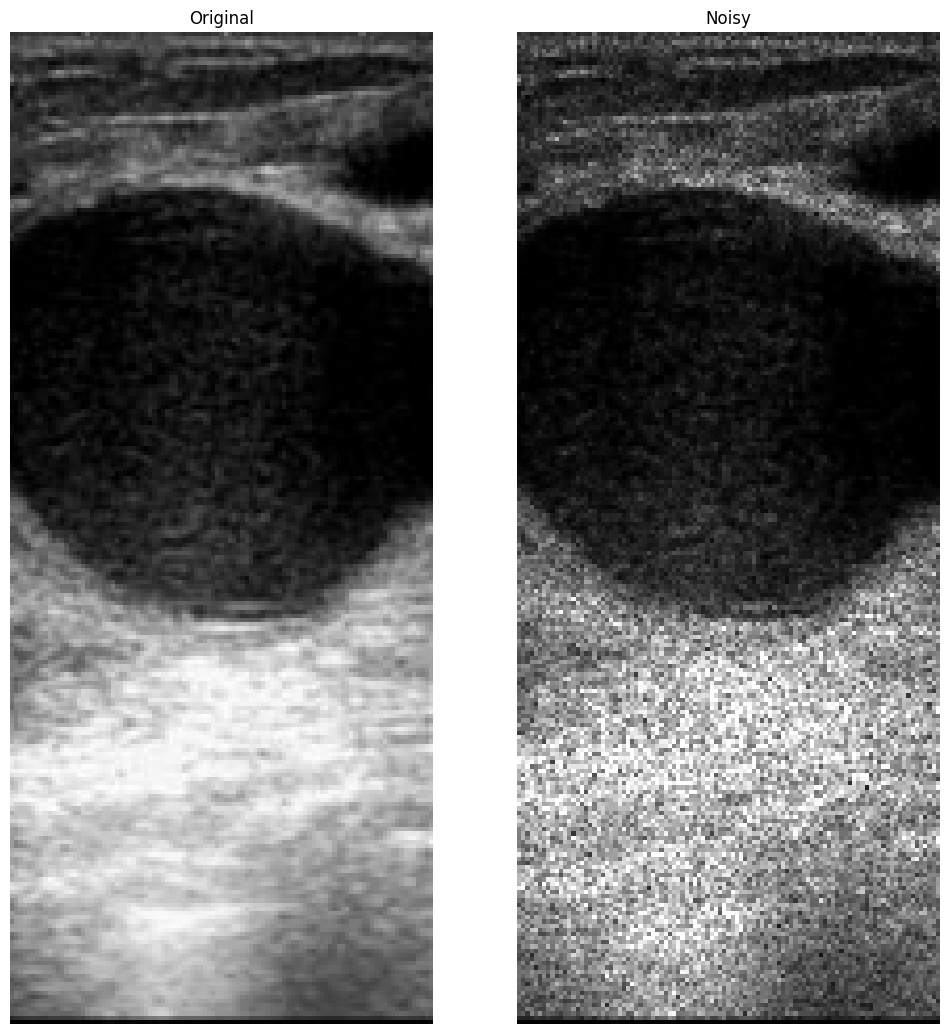

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.restoration import (
 denoise_bilateral,
 denoise_wavelet,
 denoise_nl_means,
)
from skimage import data, img_as_float,io,color
from skimage.util import random_noise
from scipy.ndimage import uniform_filter
# Load image
original2 = io.imread('ArunaGrover_small.png')
original = img_as_float(color.rgb2gray(original2))
#original = np.mean(original2/256,2) # manual gray scale transformation
noisy = random_noise(original,mode='speckle', var=0.05)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 15), sharex=True, sharey=True)
#plt.gray()
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')

## Mean filter

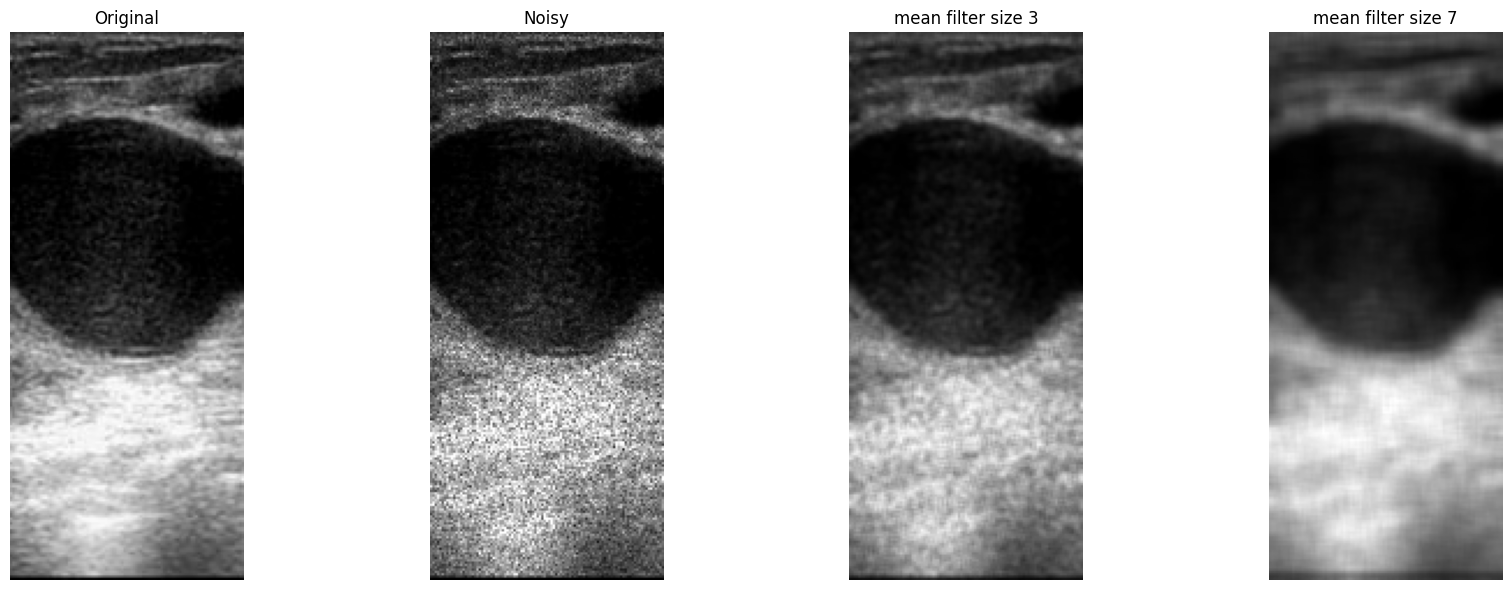

In [3]:
# size =3
mean_3 = uniform_filter(noisy, size=3)

# size 7
mean_7 = uniform_filter(noisy, size=7)

# plotting
fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(mean_3,cmap='gray')
ax[2].axis('off')
ax[2].set_title('mean filter size 3')
ax[3].imshow(mean_7,cmap='gray')
ax[3].axis('off')
ax[3].set_title('mean filter size 7')

plt.tight_layout()
plt.show()

## Mean filter interpretation
Mean filtering reduces noise by averaging pixel values in a uniform way, treating noise and edges equally. As the kernel size increases, this uniform treatment causes progressive blurring of edges, degradation of image quality, and a reduced capacity to identify anatomical structures, leading to a significant loss of diagnostic detail.

## Bilateral filter

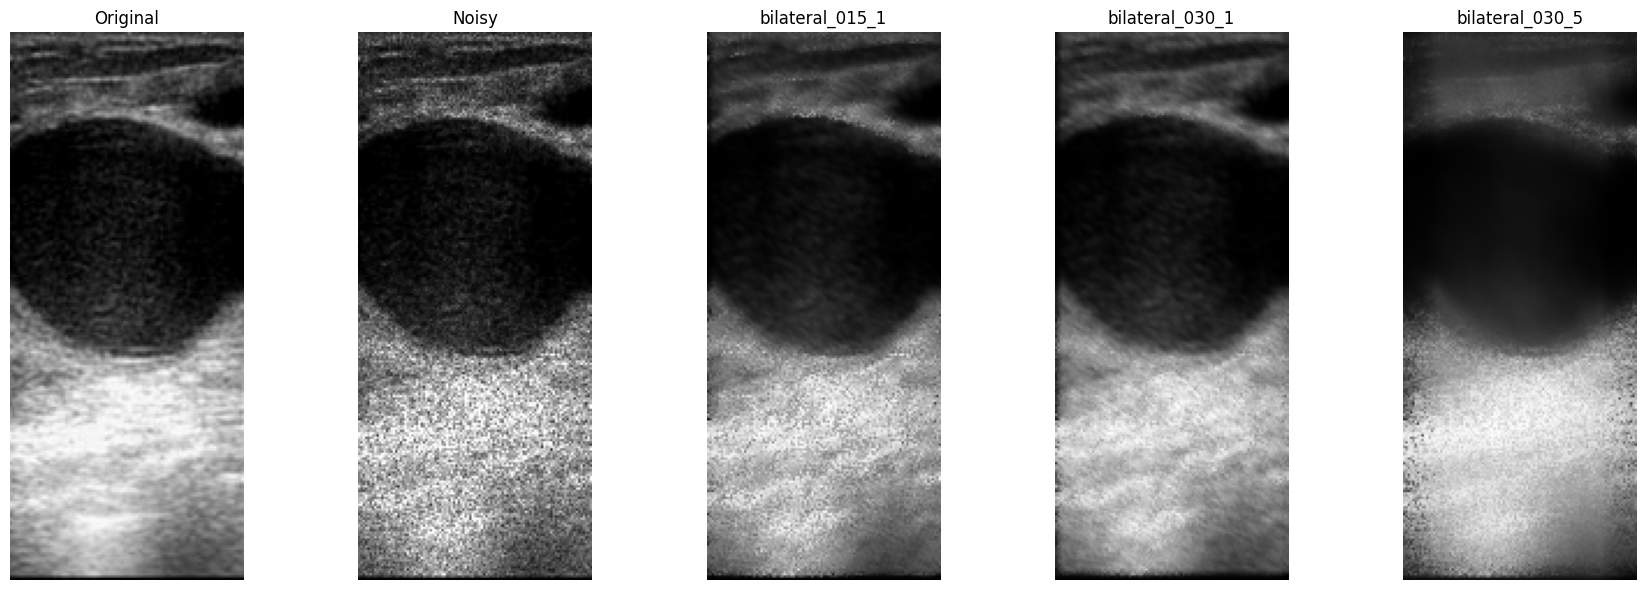

In [4]:
# applying the bilateral filter to the noisy image

#sigma_color 0.15 and sigma_spatial 1
bilateral_015_1 = denoise_bilateral(
    noisy,
    sigma_color=0.15,
    sigma_spatial=1
)

#sigma_color 0.30 and sigma_spatial 1
bilateral_030_1 = denoise_bilateral(
    noisy,
    sigma_color=0.30,
    sigma_spatial=1
)

#sigma_color 0.30 and sigma_spatial 5
bilateral_030_5 = denoise_bilateral(
    noisy,
    sigma_color=0.30,
    sigma_spatial=5
)


# plotting

fig, ax = plt.subplots(1, 5, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(bilateral_015_1,cmap='gray')
ax[2].axis('off')
ax[2].set_title('bilateral_015_1')
ax[3].imshow(bilateral_030_1,cmap='gray')
ax[3].axis('off')
ax[3].set_title('bilateral_030_1')
ax[4].imshow(bilateral_030_5,cmap='gray')
ax[4].axis('off')
ax[4].set_title('bilateral_030_5')

plt.tight_layout()
plt.show()

## Bilateral filter interpretation

The bilateral filter is an **edge-preserving smoothing filter** designed to reduce noise while maintaining sharp edges. Unlike simple averaging filters, it considers two criteria when computing the new value of a pixel:

- **Spatial distance (`sigma_spatial`)**: controls the extent of the spatial neighborhood considered during filtering. Increasing this value leads to more global smoothing effects, but if set too high, it may blur anatomical structures.

- **Intensity similarity (`sigma_color`)**: determines how different the intensity of a neighboring pixel can be while still contributing to the averaging process. Smaller values restrict the averaging to pixels with very similar intensities, allowing strong edge preservation. Larger values tolerate greater intensity differences, resulting in stronger noise suppression but with an increased risk of losing fine details and weak edges.

This dual weighting mechanism, when parameters are properly selected, allows the filter to smooth homogeneous regions while preventing blurring across edges.

In the images above, we observe that using `sigma_spatial = 1` and `sigma_color = 0.15` provides effective reduction of fine-grain noise while maintaining sharp edges. Increasing `sigma_color` to 0.30 further reduces noise while edges remain reasonably preserved. However, increasing `sigma_spatial` to 5 results in an over-smoothed appearance, with a noticeable loss of edge sharpness and fine anatomical details.


## Wavelet filter

Text(0.5, 1.0, 'img_wavelet')

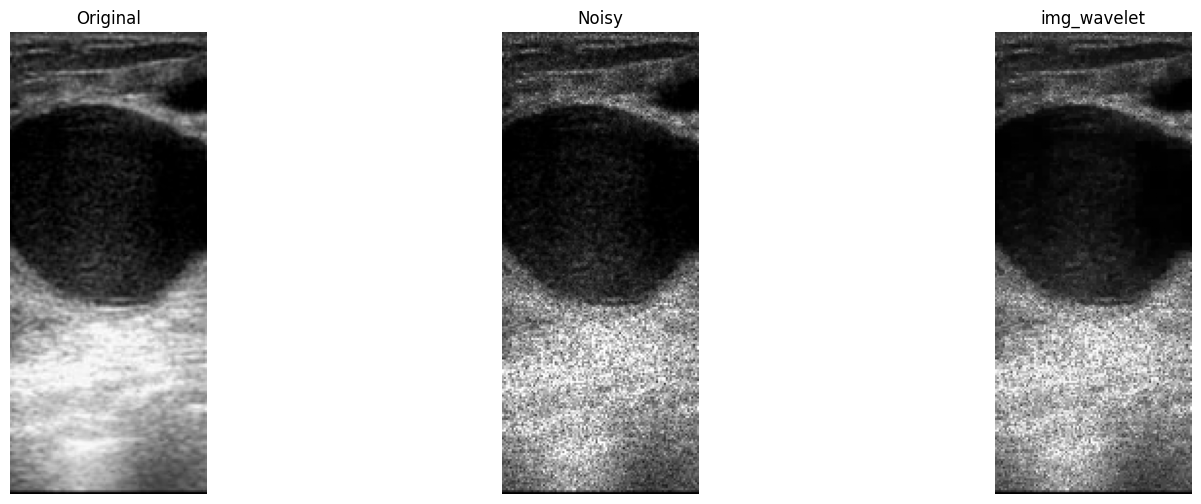

In [5]:
img_wavelet = denoise_wavelet(
    noisy,
    rescale_sigma=True
)

# plotting

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(img_wavelet,cmap='gray')
ax[2].axis('off')
ax[2].set_title('img_wavelet')


## Wavelet filter interpretation
Wavelet filtering is implemented by decomposing the image into multiple resolution scales, on whose coefficients thresholding operations are applied. Its application requires the definition of a set of parameters, such as the selected wavelet family, the number of decomposition levels, and the thresholding method used. The configuration of these parameters controls the degree of smoothing and the amount of high-frequency information preserved in the reconstructed image, directly influencing the final visual appearance and the distribution of frequency information.

- rescale_sigma: Indicates whether the estimated noise level is automatically rescaled according to the selected wavelet. This parameter affects the internal computation of the threshold applied to the wavelet coefficients during image reconstruction.

- mode: Specifies the thresholding mode applied to the wavelet coefficients. It determines how high-frequency coefficients are modified during the denoising process, controlling the manner in which they are attenuated or suppressed during image reconstruction.

## Non-Local Means



Text(0.5, 1.0, 'img_nlm_03')

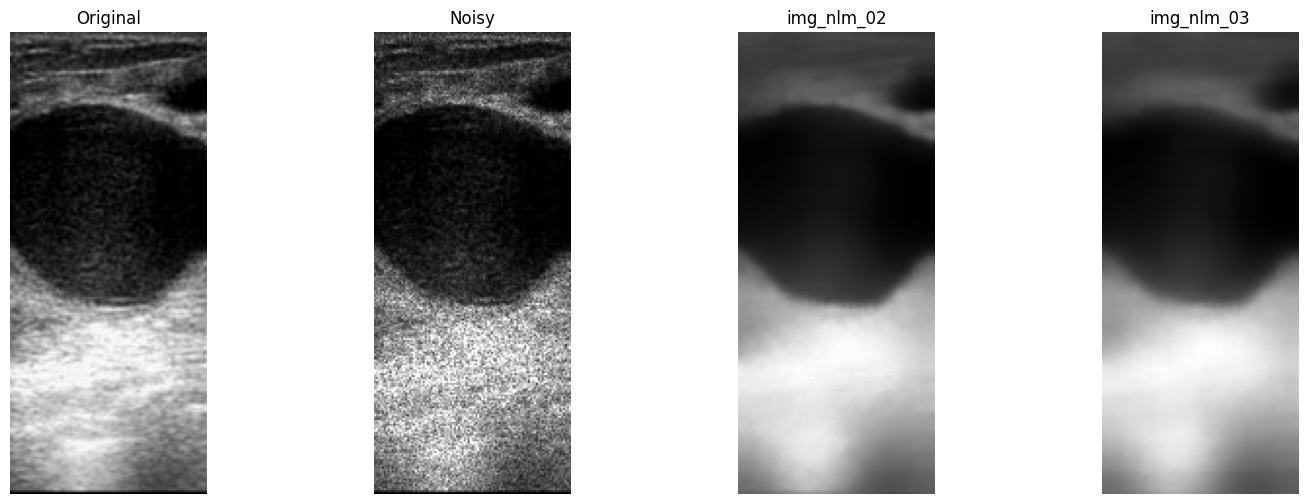

In [6]:
img_nlm_02 = denoise_nl_means(
    noisy,
    h=0.2,
    fast_mode=True,
    channel_axis=None
)

img_nlm_03 = denoise_nl_means(
    noisy,
    h=0.3,
    fast_mode=True,
    channel_axis=None
)


# plotting

fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharex=True, sharey=True)
ax[0].imshow(original,cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(noisy,cmap='gray')
ax[1].axis('off')
ax[1].set_title('Noisy')
ax[2].imshow(img_nlm_02,cmap='gray')
ax[2].axis('off')
ax[2].set_title('img_nlm_02')
ax[3].imshow(img_nlm_03,cmap='gray')
ax[3].axis('off')
ax[3].set_title('img_nlm_03')

## Non-Local Mean Filter Interpretation

Non-Local Means (NLM) is an advanced denoising algorithm that averages similar patches across the image, not just local neighbors.

It is particularly useful for ultrasound images, which are inherently noisy due to speckle, because it reduces noise without strongly blurring edges or anatomical details.

The parameter h controls the degree of smoothing: higher h removes more noise but can also reduce fine details.

A little explanation about the images that we computed:

- img_nlm_02 (h=0.2): moderate smoothing; some noise is removed while keeping edges reasonably sharp.

- img_nlm_03 (h=0.3): (stronger denoising) more noise is removed but small structures may become slightly blurred.




# Conclussions and comparison between filters

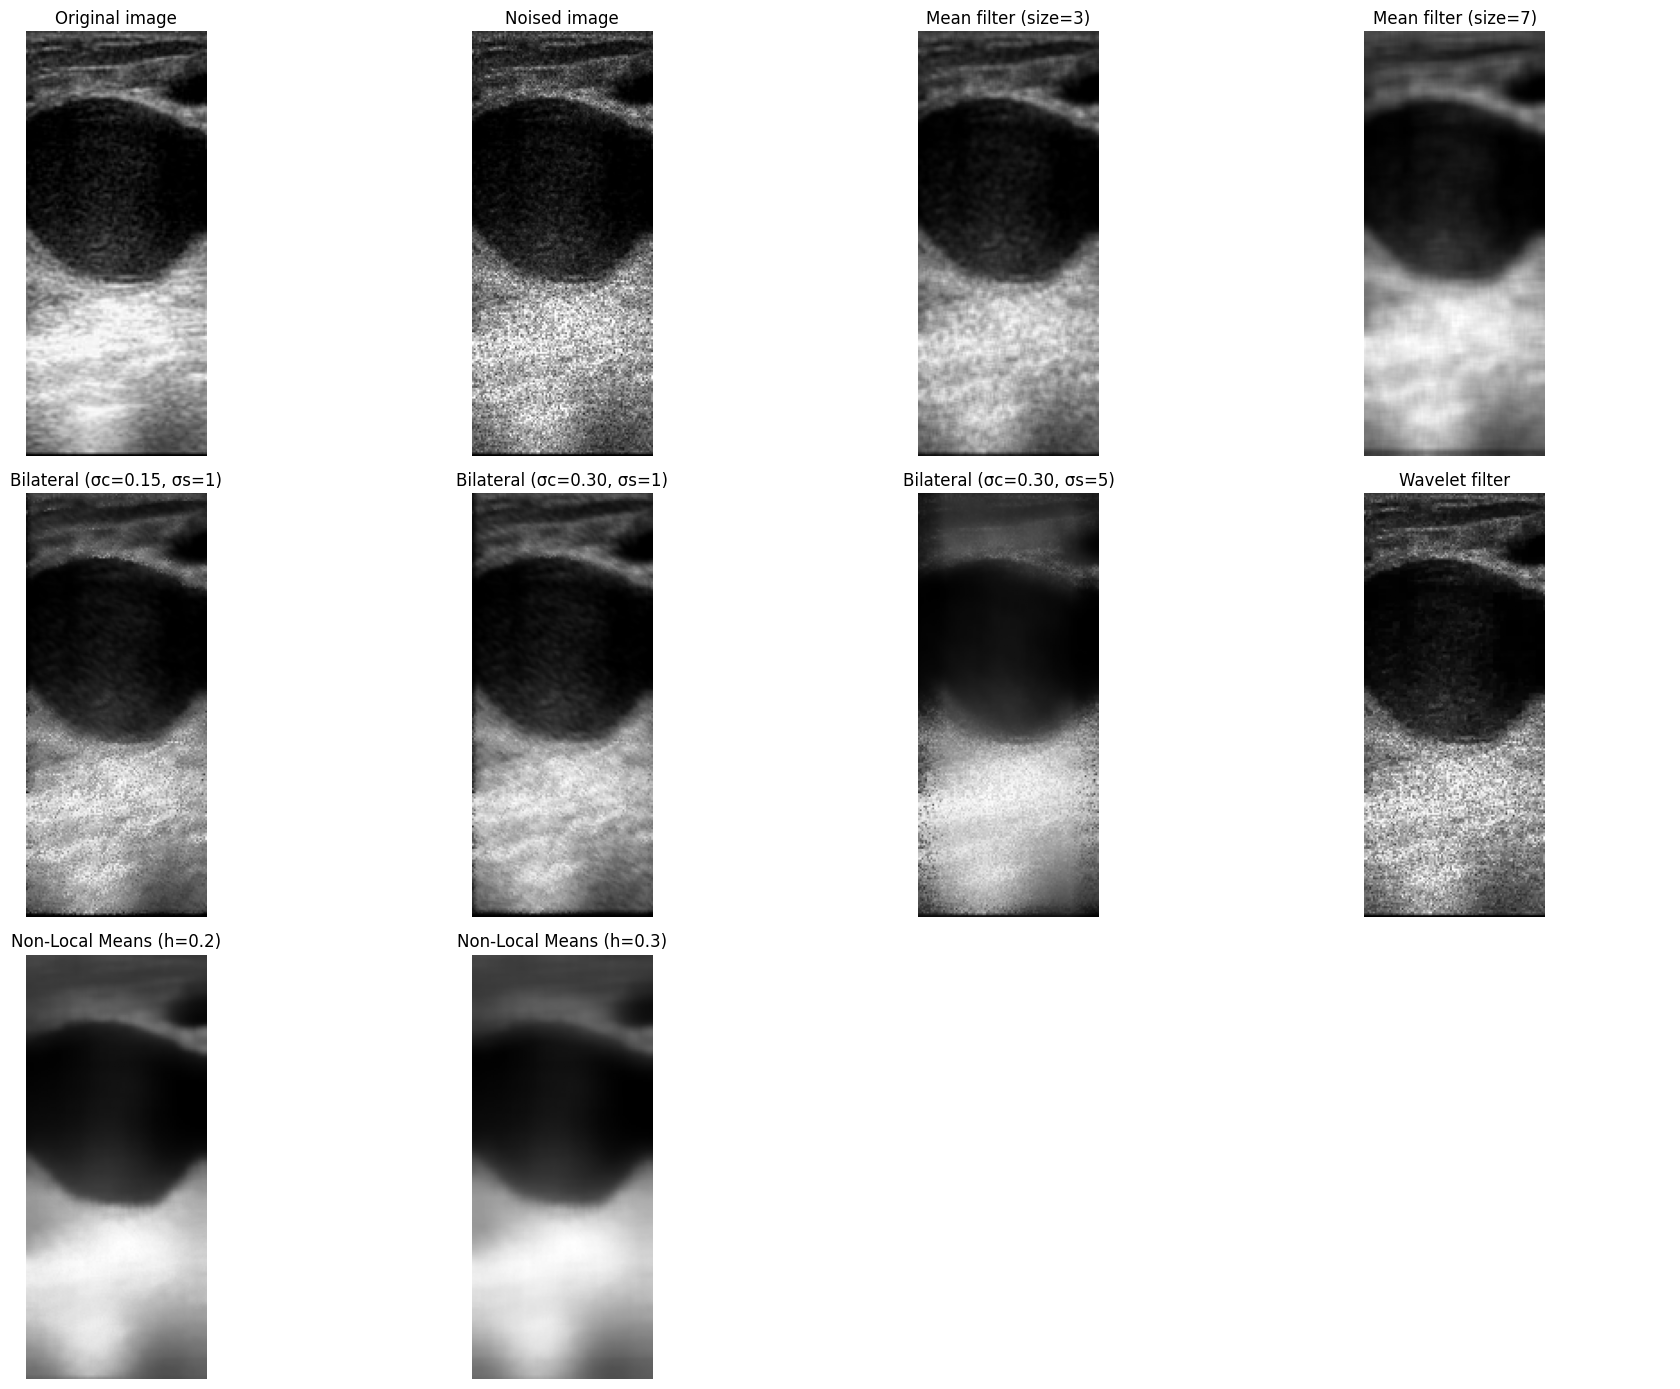

In [7]:
# all plots
fig, axes = plt.subplots(3, 4, figsize=(18, 14))
ax = axes.ravel()

images = [
    original,
    noisy,
    mean_3,
    mean_7,
    bilateral_015_1,
    bilateral_030_1,
    bilateral_030_5,
    img_wavelet,
    img_nlm_02,
    img_nlm_03
]

titles = [
    "Original image",
    "Noised image",
    "Mean filter (size=3)",
    "Mean filter (size=7)",
    "Bilateral (σc=0.15, σs=1)",
    "Bilateral (σc=0.30, σs=1)",
    "Bilateral (σc=0.30, σs=5)",
    "Wavelet filter",
    "Non-Local Means (h=0.2)",
    "Non-Local Means (h=0.3)"
]

for i in range(len(images)):
    ax[i].imshow(images[i], cmap="gray")
    ax[i].set_title(titles[i])
    ax[i].axis("off")

# shut down non used cells
for j in range(len(images), len(ax)):
    ax[j].axis("off")

plt.tight_layout()
plt.show()


Comparison between filters in the execution: 

#####  __1. Mean Filter (Uniform Filter)__

The mean filter shows the __poorest performance__ for medical image denoising. While increasing the kernel size from 3 to 7 provides stronger noise reduction, it comes at a severe cost:

- __Excessive edge blurring__: Sharp anatomical boundaries become progressively blurred
- __Loss of diagnostic detail__: Fine structures and textures are smoothed away
- __Uniform treatment__: No distinction between edges and homogeneous regions
- __Conclusion__: Not recommended for medical imaging applications where edge preservation is critical

##### __2. Bilateral Filter__

The bilateral filter demonstrates __excellent edge-preserving capabilities__ with parameter-dependent performance:

- __σc=0.15, σs=1__: Best balance between noise reduction and detail preservation; edges remain sharp while reducing fine-grain noise
- __σc=0.30, σs=1__: Stronger noise suppression with acceptable edge preservation
- __σc=0.30, σs=5__: Over-smoothing occurs; excessive spatial range causes loss of sharpness and fine anatomical details
- __Conclusion__: Optimal for medical images when properly tuned (lower σs values preferred). The dual-weighting mechanism effectively separates noise from structural features.

#####  __3. Wavelet Filter__

Wavelet denoising provides __strong noise reduction__ through multi-resolution decomposition:

- Effective removal of high-frequency noise while preserving mid-to-low frequency structural information
- Good balance between smoothing and detail retention
- Performance depends on wavelet family, decomposition levels, and thresholding strategy
- __Conclusion__: Highly effective for speckle noise reduction with good edge preservation. Suitable for medical imaging when properly configured.

##### __4. Non-Local Means (NLM)__

NLM filtering shows __superior performance__ by exploiting image self-similarity:

- __h=0.2__: Moderate denoising with excellent detail preservation; edges remain crisp
- __h=0.3__: Stronger noise removal but with some loss of fine structures
- Particularly effective for speckle noise typical in ultrasound images
- Preserves texture patterns better than spatial filters
- __Conclusion__: Best overall performance for medical ultrasound images. The patch-based approach successfully distinguishes between noise and anatomical features.

##### __Summary of filters for Medical Image Denoising:__

1. __Non-Local Means__ (h=0.2): Best balance of noise reduction and detail preservation
2. __Bilateral Filter__ (σc=0.15, σs=1): Excellent edge preservation with good noise reduction
3. __Wavelet Filter__: Strong performance with multi-scale analysis
4. __Mean Filter__: Poor choice due to excessive blurring


So with this data we can suggest that : 
- For __ultrasound images__ with speckle noise: NLM or Bilateral filters are preferred
- For __real-time applications__: Bilateral filter offers good computational efficiency
- For __research/analysis__: NLM provides the best quality but at higher computational cost
- __Avoid__: Simple mean filtering in medical diagnostics due to loss of critical anatomical information

The selection of denoising method should prioritize __edge preservation__ and __diagnostic detail retention__ over aggressive noise removal, as over-smoothing can obscure pathological findings.
